In [45]:
# problem: remove ab aggregates from single positive EVs
# target: 0 for ab aggregates, 1 for EV (classification)

In [46]:
import pandas as pd
%matplotlib inline 
import numpy as np
from scipy.stats import lognorm, norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

In [47]:
#AB fitting with curve_fit, bins need to be 200!
# df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230427 tim4 b1 c1/pbs/20230427 tim4 pbs AB total.csv')

df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230407 ev profiler kit/control cd9 cd81/wash twice/total.csv')

#discard headers
df_new = df.loc[13:] # 14 for single file, 13 for 'total' file
#print(df_new.head()) #debug
#df1=df_new.columns.str.split(',', expand=True)
df1=df_new[df_new.columns[0]].str.split(',', expand=True)
df1.columns = df1.iloc[0]
# print(df1.head())
# print(df1.index[0])
df1=df1.drop(df1.index[0])
# print(df1.head())
df1=df1.reset_index(drop=True)
df1 = df1[df1.columns].astype(float)

rslt_df_0 = df1[(df1['Channel 1 binned counts'] >= 3 )| (df1['Channel 2 binned counts'] >= 3)]  #channel 1 or 2 positive
radius = rslt_df_0[rslt_df_0['radius_of_gyration']<300]['radius_of_gyration']
print('interested particle numbers for ab aggregates')
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())

interested particle numbers for ab aggregates
2226
median radius of interested particle numbers
18.7336


(array([239., 825., 453., 149.,  88.,  70.,  50.,  38.,  34.,  24.,  24.,
         19.,  16.,  13.,  12.,  10.,   9.,   8.,  14.,   9.,  10.,  13.,
          8.,   5.,   7.,  18.,   4.,   3.,   4.,   4.,   4.,   3.,   5.,
          3.,   4.,   5.,   4.,   4.,   5.,   0.,   0.,   3.,   3.,   2.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  8.343956  ,  13.30308388,  18.26221176,  23.22133964,
         28.18046752,  33.1395954 ,  38.09872328,  43.05785116,
         48.01697904,  52.97610692,  57.9352348 ,  62.89436268,
         67.85349056,  72.81261844,  77.77174632,  82.7308742 ,
         87.69000208,  92.64912996,  97.60825784, 102.56738572,
        107.5265136 , 112.48564148, 117.44476936, 122.40389724,
        127.36302512, 132.322153  , 137.28128088, 142.24040876,
        147.19953664, 152.15866452, 157.1177924 , 162.07692028,
        167.03604816, 171.99517604, 176.95430392, 181.9134318 ,
        186.87255968, 191.83168756, 196.79081544, 201.74994332,
        206.709071

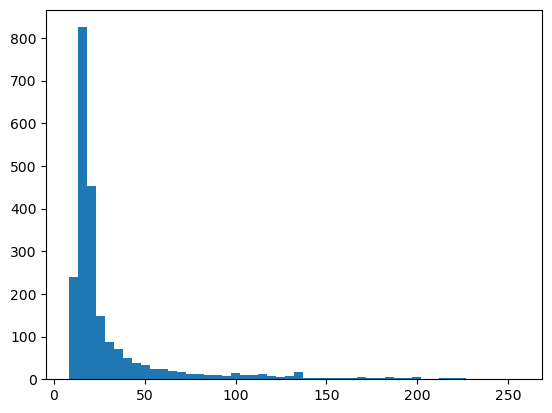

In [48]:
plt.hist(radius,bins=50)

In [49]:
#label ab aggregates as 0 for classification

rslt_df_0=rslt_df_0.reset_index(drop=True)
# rslt_df_0=rslt_df_0.drop('index', axis=1)
rslt_df_0['label'] = [0]*len(rslt_df_0)

In [50]:
#EV
path = r'~/Desktop/codi data/troubleshooting/20230427 tim4 b1 c1/B1/20230427 tim4 B1 ONI total.csv'
df=pd.read_table(path)

df_new = df.loc[13:] # 14 for single file, 13 for 'total' file
#print(df_new.head()) #debug
#df1=df_new.columns.str.split(',', expand=True)
df1=df_new[df_new.columns[0]].str.split(',', expand=True)
df1.columns = df1.iloc[0]
df1=df1.drop(df1.index[0])
df1=df1.reset_index(drop=True)
df2 = df1[df1.columns].astype(float)

rslt_df_1 = df2[(df2['Channel 1 binned counts'] >= 3 )& (df2['Channel 2 binned counts'] >= 3)]  #channel 1&2 positive
radius = rslt_df_1[rslt_df_1['radius_of_gyration']<300]['radius_of_gyration']
# radius = rslt_df['radius_of_gyration']
print(len(rslt_df_1))
print('median radius of interested particle numbers')
print(radius.median())
chan_1_2 = len(radius)

8148
median radius of interested particle numbers
49.211771


(array([ 41., 181., 408., 692., 801., 773., 631., 577., 465., 390., 331.,
        316., 320., 244., 221., 223., 202., 187., 134., 146., 131., 127.,
         95.,  75.,  82.,  66.,  52.,  45.,  44.,  29.,  31.,  23.,  19.,
          8.,   8.,   5.,   6.,   6.,   2.,   2.,   1.,   2.,   1.,   2.,
          0.,   1.,   0.,   0.,   0.,   2.]),
 array([  8.355216  ,  13.49192828,  18.62864056,  23.76535284,
         28.90206512,  34.0387774 ,  39.17548968,  44.31220196,
         49.44891424,  54.58562652,  59.7223388 ,  64.85905108,
         69.99576336,  75.13247564,  80.26918792,  85.4059002 ,
         90.54261248,  95.67932476, 100.81603704, 105.95274932,
        111.0894616 , 116.22617388, 121.36288616, 126.49959844,
        131.63631072, 136.773023  , 141.90973528, 147.04644756,
        152.18315984, 157.31987212, 162.4565844 , 167.59329668,
        172.73000896, 177.86672124, 183.00343352, 188.1401458 ,
        193.27685808, 198.41357036, 203.55028264, 208.68699492,
        213.823707

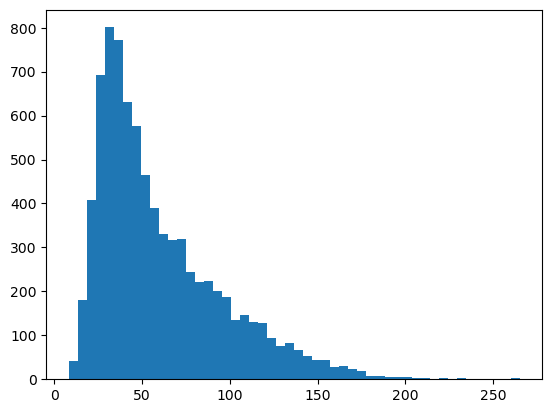

In [51]:
plt.hist(radius,bins=50)

In [52]:
#label EV as 1 for classification

rslt_df_1=rslt_df_1.reset_index(drop=True)
# rslt_df_1=rslt_df_1.drop('index', axis=1)
rslt_df_1['label'] = [1]*len(rslt_df_1)

In [53]:
# split 1 double positive particle to 2 single positive particle and change the feature value
import random
import copy

# rslt_df_1_1 = pd.DataFrame()
rslt_df_1_1 = copy.deepcopy(rslt_df_1)
random_numbers = np.random.randint(low=0, high=3, size=len(rslt_df_1_1))
rslt_df_1_1['Channel 2 binned counts'] = random_numbers
rslt_df_1_1['Channel 2 positive'] = 0

# rslt_df_1_1 = pd.DataFrame()
rslt_df_1_2 = copy.deepcopy(rslt_df_1)
random_numbers = np.random.randint(low=0, high=3, size=len(rslt_df_1_1))
rslt_df_1_2['Channel 1 binned counts'] = random_numbers
rslt_df_1_2['Channel 1 positive'] = 0

In [54]:
n_0 = int(len(rslt_df_0)*4/5)
n_1 = int(len(rslt_df_1)*4/5)

In [55]:
train_0 = rslt_df_0.iloc[:n_0,:]
# train_1 = rslt_df_1.iloc[:n_1,:]
train_2 = rslt_df_1_1.iloc[:n_1,:]
train_3 = rslt_df_1_2.iloc[:n_1,:]
train_total = pd.concat([train_0,train_2,train_3]).reset_index(drop=True)
# train = train_total.sample(frac=1, random_state=42).reset_index(drop=True)
train = train_total

In [56]:
test_0 = rslt_df_0.iloc[n_0:,:]
# test_1 = rslt_df_1.iloc[n_1:,:]
test_2 = rslt_df_1_1.iloc[n_1:,:]
test_3 = rslt_df_1_2.iloc[n_1:,:]
test_total = pd.concat([test_0,test_2,test_3]).reset_index(drop=True)
# test = test_total.sample(frac=1, random_state=42).reset_index(drop=True)
test = test_total

In [57]:
train

13,id,x,y,num_localisations,skew,circularity,density,convex_hull_area,discretised_area,radius_of_gyration,length,distance_birth,distance_death,channelGroupIndex,Channel 1 binned counts,Channel 2 binned counts,Channel 1 positive,Channel 2 positive,label
0,32465.0,46512.523,78794.010,464.0,1.839434,0.859016,0.107602,4312.1875,6800.0,19.689600,72.562130,1612.90770,3.385545,0.0,0.0,16.0,0.0,1.0,0
1,32469.0,47834.477,77767.850,34.0,1.781715,0.590072,0.010626,3199.5625,4400.0,27.191032,82.256590,531.46960,17.111925,0.0,0.0,11.0,0.0,1.0,0
2,32470.0,48343.600,78099.170,30.0,1.762542,0.772791,0.023402,1281.9531,2400.0,15.957308,48.440710,531.46960,17.766054,0.0,0.0,8.0,0.0,1.0,0
3,32473.0,48787.824,75582.980,34.0,1.027034,0.695884,0.010928,3111.1494,4000.0,21.249687,43.988724,487.89218,17.524555,0.0,0.0,10.0,0.0,1.0,0
4,32474.0,48593.900,76125.000,116.0,1.203278,0.819528,0.040705,2849.7500,4800.0,16.703272,49.019146,487.89218,6.600189,0.0,0.0,12.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,281874.0,13333.669,66962.960,71.0,1.079240,0.892957,0.011090,6401.9375,7600.0,27.423016,93.637665,409.91360,13.913384,0.0,2.0,6.0,0.0,1.0,1
14813,281880.0,9939.347,45296.290,49.0,3.192189,0.503558,0.005775,8485.5000,5600.0,40.332397,168.646800,197.28981,12.138171,0.0,1.0,8.0,0.0,1.0,1
14814,281901.0,18066.469,51773.600,51.0,1.243571,0.786533,0.002931,17397.6250,9600.0,65.418370,162.909180,160.44688,31.029620,0.0,2.0,5.0,0.0,1.0,1
14815,281906.0,20799.482,36863.652,17.0,1.294987,0.808684,0.003916,4340.7188,4800.0,30.770826,91.059630,261.75815,68.998535,0.0,0.0,3.0,0.0,1.0,1


In [58]:
import matplotlib.pylab as plt
%matplotlib inline

In [59]:
# from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# from sklearn.base import TransformerMixin

class Transformer():

    def __init__(self):
        self.mean = 0
    
    def fit(self, X, y=None):
        '''
        Get mean
        Input: X datafrome
        '''
        
    def transform(self, X, y=None):
        '''
        Transform data and fill na with mean
        Input: X dataframe
        '''
        df = pd.DataFrame()
        
        df['num_localisations']=X['num_localisations']
        df['skew']=X['skew']
        df['circularity']=X['circularity']
        df['density']=X['density']
        df['convex_hull_area']=X['convex_hull_area']
        df['discretised_area']=X['discretised_area']
        df['radius_of_gyration']=X['radius_of_gyration']
        df['length']=X['length']
        df['distance_birth']=X['distance_birth']
        df['distance_death']=X['distance_death']
        df['Channel 1 binned counts'] = X['Channel 1 binned counts']
        df['Channel 2 binned counts'] = X['Channel 2 binned counts']

        
        return df

    
    def fit_transform(self, X, y=None):
        '''
        Combine fit and transform
        Input: X dataframe
        '''        
        self.fit(X)
        return self.transform(X)
          

In [60]:
# df_copy.tail(20)
features = list(train.columns)
target = 'label'
features.remove(target)

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

class_weights = {0: 1, 1: 1}
# class_weight=class_weights

pipeline = Pipeline(steps=[
    ('tf', Transformer()),
    ('scaler', MinMaxScaler()),       # Apply MinMaxScaler
#     ('regressor', RandomForestRegressor())
    ('regressor', RandomForestClassifier(class_weight='balanced'))
])



In [62]:
# Fit the pipeline
pipeline.fit(X_train, y_train)
# print(pipeline[2].coef_)

import matplotlib.pylab as plt
%matplotlib inline

'''Train'''

y_train_pred = pipeline.predict(X_train).astype(int)
# plt.scatter(y_train, y_train_pred, alpha=0.3)

'''Test'''

y_test_pred = pipeline.predict(X_test).astype(int)
# plt.scatter(y_test, y_test_pred, alpha=0.3)


In [63]:
from sklearn.metrics import accuracy_score

# Compute accuracy score
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print accuracy score
print("Accuracy:", accuracy_train)
print("Accuracy:", accuracy_test)

Accuracy: 1.0
Accuracy: 0.981651376146789


In [64]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_train, y_train_pred)

# Print classification report
print(report)

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_test_pred)

# Print classification report
print(report)

from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm1 = confusion_matrix(y_train, y_train_pred)
cm2 = confusion_matrix(y_test, y_test_pred)


# Print confusion matrix
print(cm1)
print(cm2)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1781
           1       1.00      1.00      1.00     13036

    accuracy                           1.00     14817
   macro avg       1.00      1.00      1.00     14817
weighted avg       1.00      1.00      1.00     14817

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       446
           1       0.99      0.99      0.99      3260

    accuracy                           0.98      3706
   macro avg       0.96      0.95      0.96      3706
weighted avg       0.98      0.98      0.98      3706

[[ 1781     0]
 [    0 13036]]
[[ 407   39]
 [  29 3231]]


In [65]:
#fit single positive channels with double positive EV distribution and AB distribution from corresponding channels
# cd9
# df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230407 ev profiler kit/oni ev cd9 cd81/wash twice/1.csv')
#df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230421 tim4 sonicate ab d10/ab/20230421 tim4 oni ev ab 2.csv')


rslt_df1 = df2[(df2['Channel 1 binned counts'] < 3 )& (df2['Channel 2 binned counts'] >= 3)]  #channel 2 positive
rslt_df2 = df2[(df2['Channel 1 binned counts'] >= 3 )& (df2['Channel 2 binned counts'] < 3)]  #channel 1 positive
rslt_df = pd.concat([rslt_df1,rslt_df2]).reset_index(drop=True)

radius = rslt_df['radius_of_gyration']
print('interested particle numbers for channel 2/CD9 single positive')
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())

X_test_2 = rslt_df[features]
y_test_2 = pipeline.predict(X_test_2)

#calculate the positive percentage as 'EV'
sum(y_test_2)/len(y_test_2)*100


interested particle numbers for channel 2/CD9 single positive
12734
median radius of interested particle numbers
36.304525


81.38840898382284

In [66]:
# Print accuracy score
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
# Train Accuracy: 0.9221529847376502
# Test Accuracy: 0.9371890547263682

Train Accuracy: 1.0
Test Accuracy: 0.981651376146789


In [67]:
print('predicted EV percentage from single positive particles:',sum(y_test_2)/len(y_test_2)*100)

predicted EV percentage from single positive particles: 81.38840898382284


In [68]:
# pipeline.predict_proba(X_train)[:, 1]

AUC-ROC Score: 0.9956965803736004


Text(0, 0.5, 'true positive rate')

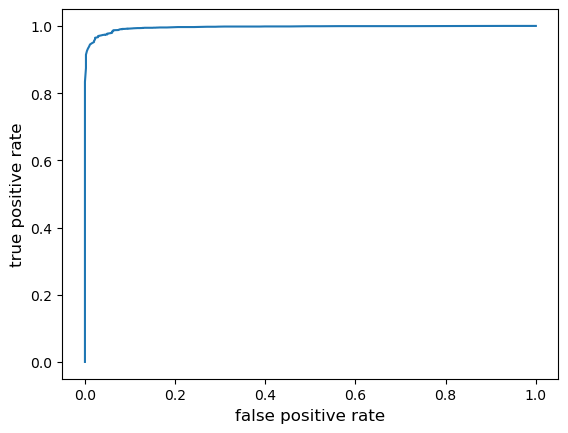

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# Make predictions on the train & test set
# y_pred_prob_train = pipeline.predict_proba(X_train)[:, 1]
y_pred_prob_test = pipeline.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_pred_prob_test)

print("AUC-ROC Score:", auc_roc_score)

# roc_auc_score(y_train, y_train_proba[:, 1])

# roc_auc_score(y_test, y_test_proba[:, 1])

fpr_rf, tpr_rf, thresholds_rf_1 = metrics.roc_curve(y_test, y_pred_prob_test)

plt.plot(fpr_rf,tpr_rf)

plt.xlabel('false positive rate', fontsize=12)
plt.ylabel('true positive rate', fontsize=12)

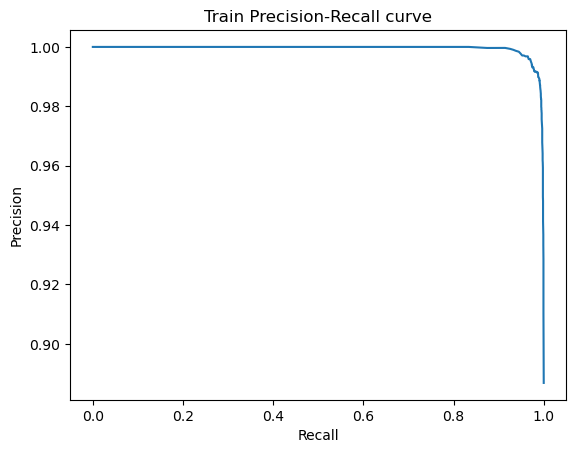

In [70]:
from sklearn.metrics import precision_recall_curve

precision_rf, recall_rf, thresholds_rf_2 = precision_recall_curve(y_test, y_pred_prob_test)
plt.plot(recall_rf, precision_rf)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

In [71]:
#fit single positive channels with double positive EV distribution and AB distribution from corresponding channels
# cd9
# df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230407 ev profiler kit/oni ev cd9 cd81/wash twice/1.csv')
#df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230421 tim4 sonicate ab d10/ab/20230421 tim4 oni ev ab 2.csv')

#channel 2
rslt_df1 = df2[(df2['Channel 1 binned counts'] < 3 )& (df2['Channel 2 binned counts'] >= 3)]  #channel 2 positive
#channel 1
rslt_df2 = df2[(df2['Channel 1 binned counts'] >= 3 )& (df2['Channel 2 binned counts'] < 3)]  #channel 1 positive
rslt_df = rslt_df2

radius = rslt_df['radius_of_gyration']
print('interested particle numbers for channel 1/CD81 single positive')
chan_1 = len(radius)
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())

X_test_2 = rslt_df[features]
y_test_2 = pipeline.predict(X_test_2)

#calculate the positive percentage as 'EV'
print('predicted EV percentage from single positive particles at channel 1:',sum(y_test_2)/len(y_test_2)*100)
# sum(y_test_2)/len(y_test_2)*100
chan_1_pos = sum(y_test_2)

interested particle numbers for channel 1/CD81 single positive
8108
median radius of interested particle numbers
33.316064999999995
predicted EV percentage from single positive particles at channel 1: 99.80266403552048


In [72]:
#fit single positive channels with double positive EV distribution and AB distribution from corresponding channels
# cd9
# df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230407 ev profiler kit/oni ev cd9 cd81/wash twice/1.csv')
#df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230421 tim4 sonicate ab d10/ab/20230421 tim4 oni ev ab 2.csv')

#channel 2
rslt_df1 = df2[(df2['Channel 1 binned counts'] < 3 )& (df2['Channel 2 binned counts'] >= 3)]  #channel 2 positive
#channel 1
rslt_df2 = df2[(df2['Channel 1 binned counts'] >= 3 )& (df2['Channel 2 binned counts'] < 3)]  #channel 1 positive
rslt_df = rslt_df1

radius = rslt_df['radius_of_gyration']
print('interested particle numbers for channel 2/CD9 single positive')
chan_2 = len(radius)
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())

X_test_2 = rslt_df[features]
y_test_2 = pipeline.predict(X_test_2)

#calculate the positive percentage as 'EV'
sum(y_test_2)/len(y_test_2)*100
chan_2_pos = sum(y_test_2)

print('predicted EV percentage from single positive particles at channel 2:',sum(y_test_2)/len(y_test_2)*100)


interested particle numbers for channel 2/CD9 single positive
4626
median radius of interested particle numbers
46.4529725
predicted EV percentage from single positive particles at channel 2: 49.113705144833546


In [74]:
total = chan_1_pos + chan_2_pos + chan_1_2

print('after correction')
print('double positive percentage:')
print('single positive percentage at channel 1 647:')
print('single positive percentage at channel 2 488:')
print(f"{(chan_1_2/total):.2f}")
print(f"{(chan_1_pos/total):.2f}")
print(f"{(chan_2_pos/total):.2f}")



after correction
double positive percentage:
single positive percentage at channel 1 647:
single positive percentage at channel 2 488:
0.44
0.44
0.12


In [75]:
total = chan_1 + chan_2 + chan_1_2

print('before correction')
print('double positive percentage:')
print('single positive percentage at channel 1 647:')
print('single positive percentage at channel 2 488:')
print(f"{(chan_1_2/total):.2f}")
print(f"{(chan_1/total):.2f}")
print(f"{(chan_2/total):.2f}")



before correction
double positive percentage:
single positive percentage at channel 1 647:
single positive percentage at channel 2 488:
0.39
0.39
0.22


In [78]:
import shap

model_rf=pipeline.steps[2][1]

X_display1 = pipeline.steps[0][1].transform(X_test)
X_display2 = pipeline.steps[1][1].transform(X_display1)
X_display = pd.DataFrame(X_display2, columns=X_display1.columns)


explainer = shap.Explainer(model_rf)

shap_values = explainer.shap_values(X_display)
sv = explainer(X_display)


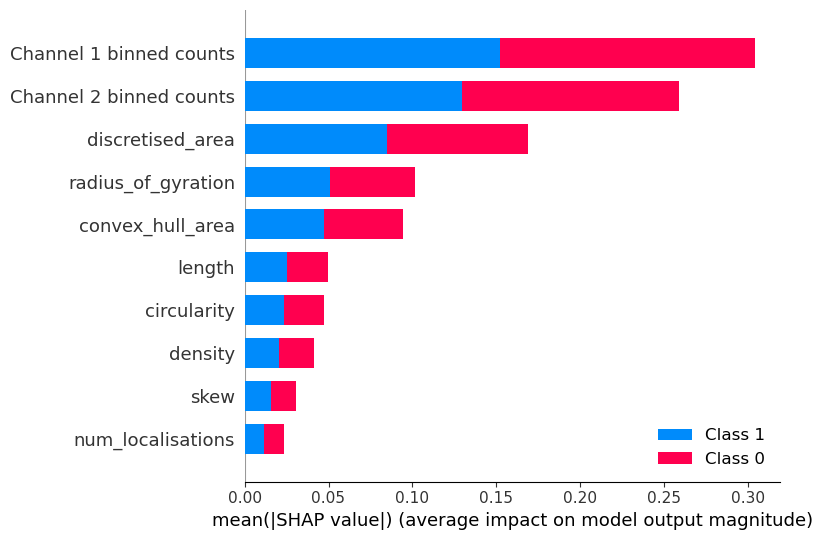

In [79]:
shap.summary_plot(shap_values, X_display)

In [80]:
shap_values[0]

array([[-0.01711372, -0.0326752 , -0.07571616, ..., -0.01986159,
         0.18154539,  0.12603338],
       [-0.0124013 , -0.02544583, -0.02328376, ...,  0.04655673,
         0.18936712,  0.08875291],
       [-0.00225757, -0.01072597, -0.02871015, ...,  0.03331754,
         0.18384081,  0.05477008],
       ...,
       [-0.00895942, -0.01692392, -0.03968172, ...,  0.03237411,
        -0.47416326, -0.05011382],
       [-0.00960357, -0.0355121 , -0.08780129, ..., -0.03290213,
         0.18649162,  0.07652449],
       [-0.02437257, -0.02047697, -0.02932253, ..., -0.02611439,
        -0.18823516,  0.00796896]])

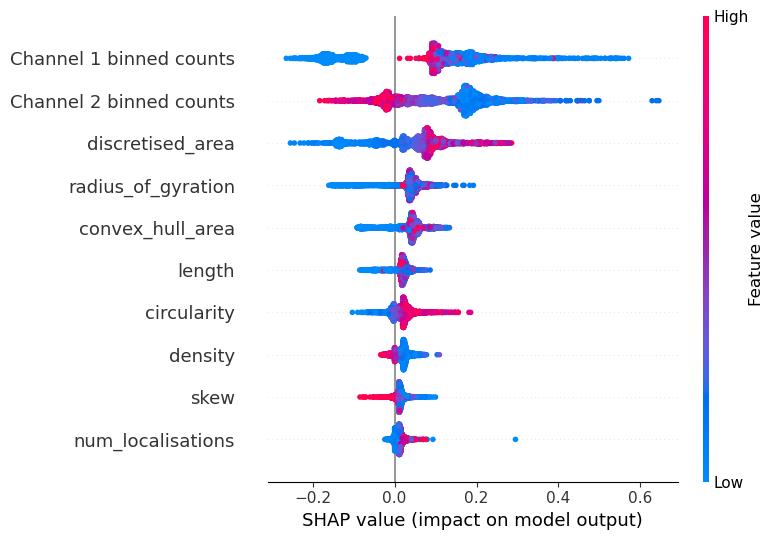

In [81]:
shap.summary_plot(shap_values[1], X_display)

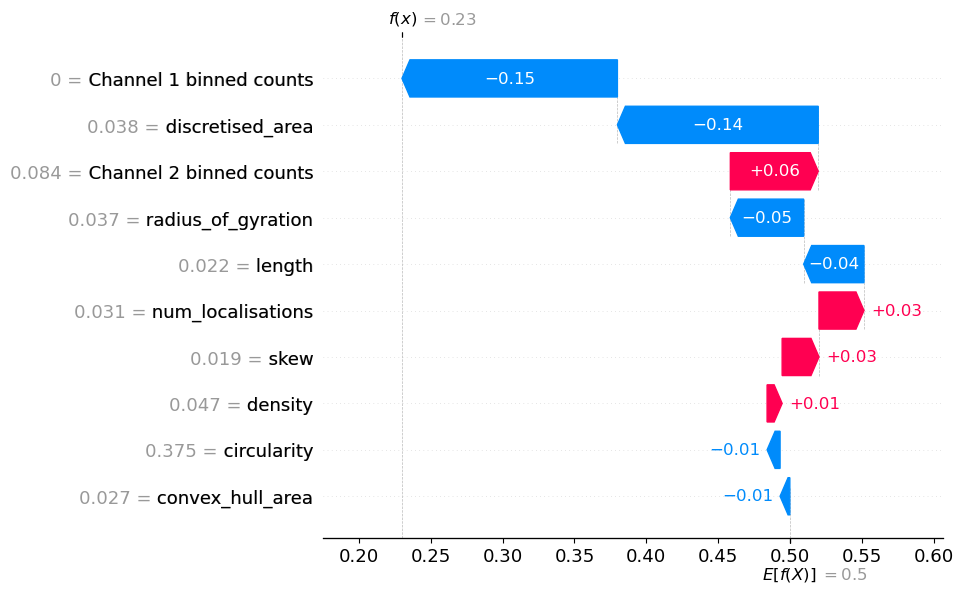

In [82]:
from shap import TreeExplainer, Explanation

exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X_display.values, 
                  feature_names=X_display.columns)
idx = 7
shap.plots.waterfall(exp[idx])

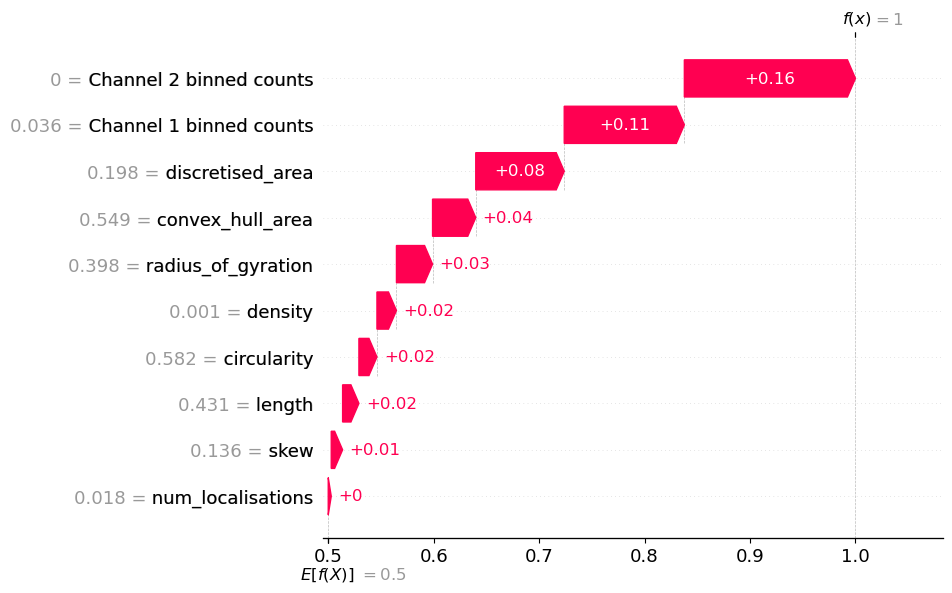

In [83]:
from shap import TreeExplainer, Explanation

exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X_display.values, 
                  feature_names=X_display.columns)
idx = 500
shap.plots.waterfall(exp[idx])

In [84]:
%store fpr_rf
%store tpr_rf
%store thresholds_rf_1
%store precision_rf
%store recall_rf
%store thresholds_rf_2


Stored 'fpr_rf' (ndarray)
Stored 'tpr_rf' (ndarray)
Stored 'thresholds_rf_1' (ndarray)
Stored 'precision_rf' (ndarray)
Stored 'recall_rf' (ndarray)
Stored 'thresholds_rf_2' (ndarray)


In [85]:
%store -r fpr_svm
%store -r tpr_svm
%store -r thresholds_svm_1
%store -r precision_svm
%store -r recall_svm
%store -r thresholds_svm_2

In [86]:
%store -r fpr_lg
%store -r tpr_lg
%store -r thresholds_lg_1
%store -r precision_lg
%store -r recall_lg
%store -r thresholds_lg_2

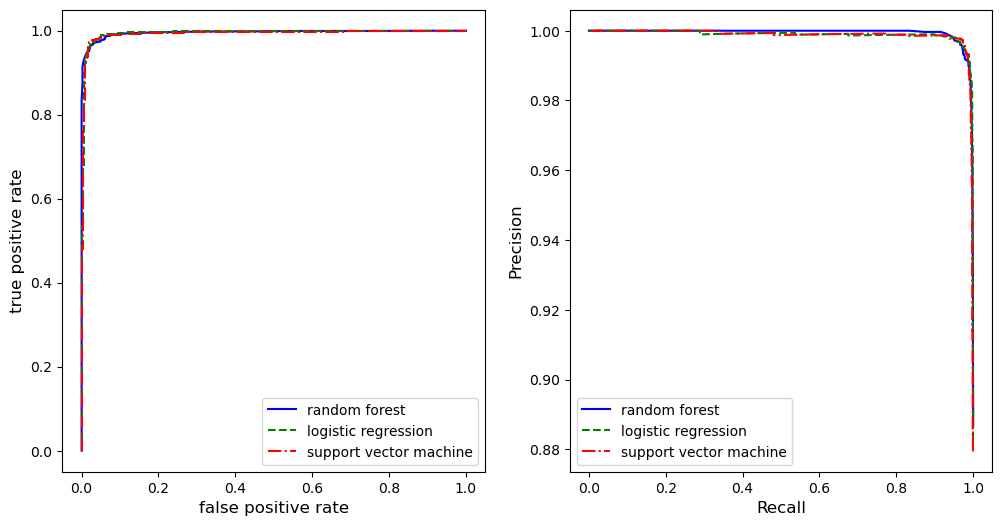

In [87]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr_rf,tpr_rf,label='random forest', linestyle='-', color='blue')
plt.plot(fpr_lg,tpr_lg,label='logistic regression', linestyle='--', color='green')
plt.plot(fpr_svm,tpr_svm,label='support vector machine', linestyle='-.', color='red')

plt.xlabel('false positive rate', fontsize=12)
plt.ylabel('true positive rate', fontsize=12)

# # Set the limits for the x and y-axes
# plt.xlim(0, 0.2)  # Set x-axis limits from 2 to 8
# plt.ylim(0.8, 1)  # Set y-axis limits from -1 to 1

plt.legend()

# plt.plot(recall_svm, precision_svm)
# plt.ylabel("Precision")
# plt.xlabel("Recall")
# plt.title("Train Precision-Recall curve");

plt.subplot(1, 2, 2)

plt.plot(recall_rf, precision_rf,label='random forest', linestyle='-', color='blue')
plt.plot(recall_lg, precision_lg,label='logistic regression', linestyle='--', color='green')
plt.plot(recall_svm, precision_svm,label='support vector machine', linestyle='-.', color='red')

plt.ylabel("Precision", fontsize=12)
plt.xlabel("Recall", fontsize=12)


# # Set the limits for the x and y-axes
# plt.xlim(0, 0.2)  # Set x-axis limits from 2 to 8
# plt.ylim(0.8, 1)  # Set y-axis limits from -1 to 1

plt.legend()
